<a href="https://colab.research.google.com/github/Rafat97/my-tensorflow/blob/image/Ball_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ball Classification 

In [0]:
# !rm -rf /root/.keras/datasets/ball_dataset_3.zip

In [0]:
# !ls -al /root/.keras/

In [0]:
#import all the libeart
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [4]:
_URL = "https://raw.githubusercontent.com/Rafat97/my-tensorflow/dataset/ball_dataset_4.zip"
path_to_zip = tf.keras.utils.get_file('ball_dataset_3.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'ball-dataset')
PATH

'/root/.keras/datasets/ball-dataset'

In [5]:
data_dir = pathlib.Path(PATH)
dir_info = list(data_dir.glob('*'))
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
print("data_dir = ",data_dir)
print("dir_info :")
print(dir_info)
print("train_dir = ",train_dir)
print("validation_dir = ",validation_dir)

data_dir =  /root/.keras/datasets/ball-dataset
dir_info :
[PosixPath('/root/.keras/datasets/ball-dataset/validation'), PosixPath('/root/.keras/datasets/ball-dataset/train'), PosixPath('/root/.keras/datasets/ball-dataset/test')]
train_dir =  /root/.keras/datasets/ball-dataset/train
validation_dir =  /root/.keras/datasets/ball-dataset/validation


In [6]:
train_ball_dir = os.path.join(train_dir, 'ball')  
train_no_ball_dir = os.path.join(train_dir, 'no-ball')  
validation_ball_dir = os.path.join(validation_dir, 'ball')  
validation_no_ball_dir = os.path.join(validation_dir, 'no-ball')  
num_ball_tr = len(os.listdir(train_ball_dir)) + len(os.listdir(train_no_ball_dir))
num_ball_val = len(os.listdir(validation_ball_dir))  + len(os.listdir(validation_no_ball_dir))
total_train = num_ball_tr
total_val = num_ball_val
print("train_ball_dir = ",train_ball_dir) 
print("train_no_ball_dir = ",train_no_ball_dir)
print("validation_ball_dir = ",validation_ball_dir)
print("validation_no_ball_dir = ",validation_no_ball_dir)
print("num_ball_tr = ",num_ball_tr)
print("num_ball_val = ",num_ball_val)

train_ball_dir =  /root/.keras/datasets/ball-dataset/train/ball
train_no_ball_dir =  /root/.keras/datasets/ball-dataset/train/no-ball
validation_ball_dir =  /root/.keras/datasets/ball-dataset/validation/ball
validation_no_ball_dir =  /root/.keras/datasets/ball-dataset/validation/no-ball
num_ball_tr =  130
num_ball_val =  36


In [0]:
# Define some variable
batch_size = 30
epochs = 35
IMG_HEIGHT = 224
IMG_WIDTH = 224

Found 130 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0.]


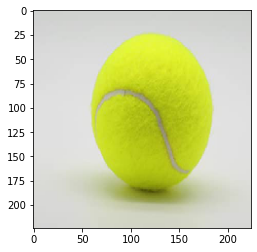

In [8]:
# Generator for our training & validation data
CLASS_NAMES = ['ball','no-ball']
train_image_generator = ImageDataGenerator(
     rescale=1./255,
  )
validation_image_generator = ImageDataGenerator(
     rescale=1./255,
)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                          #  class_mode='binary',
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              # class_mode='binary',
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                                              )

image_batch, label_batch = next(train_data_gen)
print(label_batch)
plt.imshow(image_batch[0])
# image_batch, label_batch = next(val_data_gen)
# plt.imshow(image_batch[0])

In [9]:
## using vgg19
vgg19_model  = tf.keras.applications.VGG19()
model = Sequential()
for layer in vgg19_model.layers[:-1]:
  model.add(layer)

for layer in model.layers[:]:
  layer.trainable = False

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['accuracy'])
    self.model.reset_metrics() 

In [0]:
# model = Sequential([
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(28, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     Dropout(0.2),

#     tf.keras.layers.Flatten(),

#     tf.keras.layers. Dense(512, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),

#     tf.keras.layers.Dense(1)

# ])
# model.summary()
batch_stats_callback = CollectBatchStats()
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    callbacks = [batch_stats_callback],
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
history.history

Epoch 1/35
4/4 [==============================] - 63s 16s/step - loss: 1.6677 - accuracy: 0.8000 - val_loss: 0.7148 - val_accuracy: 0.4667
Epoch 2/35
4/4 [==============================] - 79s 20s/step - loss: 0.9049 - accuracy: 0.7333 - val_loss: 2.5311 - val_accuracy: 0.5333
Epoch 3/35
4/4 [==============================] - 75s 19s/step - loss: 1.4189 - accuracy: 0.8000 - val_loss: 2.1802 - val_accuracy: 0.6000
Epoch 4/35
4/4 [==============================] - 63s 16s/step - loss: 0.5495 - accuracy: 0.8333 - val_loss: 0.7649 - val_accuracy: 0.6000
Epoch 5/35
4/4 [==============================] - 63s 16s/step - loss: 0.3912 - accuracy: 0.8333 - val_loss: 1.3034 - val_accuracy: 0.5333
Epoch 6/35
4/4 [==============================] - 63s 16s/step - loss: 1.6114 - accuracy: 0.6000 - val_loss: 1.0300 - val_accuracy: 0.6000
Epoch 7/35
4/4 [==============================] - 75s 19s/step - loss: 0.4625 - accuracy: 0.9333 - val_loss: 0.5909 - val_accuracy: 0.6000
Epoch 8/35
4/4 [===========

In [0]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

In [0]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = fn
#   img = image.load_img(path, target_size=(224, 224))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(fn)
#   print(classes)
